<a href="https://colab.research.google.com/github/Badar-Islam/Projects/blob/main/Aerofit/Aerofit_TradeMill_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Business Problem**
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

**Product Portfolio:**

- The KP281 is an entry-level treadmill that sells for $1,500.

- The KP481 is for mid-level runners that sell for $1,750.

- The KP781 treadmill is having advanced features that sell for $2,500

**Metric**

We will use count of users, probabilities, conditional probabilities to evaluate the users and create a customer profile for each product

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1M6a3BkME4VgS9R7KP8NZUyAwt0Gl0G4d -O aerofit_trademill.csv

# https://drive.google.com/file/d/1M6a3BkME4VgS9R7KP8NZUyAwt0Gl0G4d/view?usp=sharing

--2024-04-18 16:19:43--  https://drive.google.com/uc?id=1M6a3BkME4VgS9R7KP8NZUyAwt0Gl0G4d
Resolving drive.google.com (drive.google.com)... 172.253.62.101, 172.253.62.113, 172.253.62.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1M6a3BkME4VgS9R7KP8NZUyAwt0Gl0G4d [following]
--2024-04-18 16:19:43--  https://drive.usercontent.google.com/download?id=1M6a3BkME4VgS9R7KP8NZUyAwt0Gl0G4d
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [application/octet-stream]
Saving to: ‘aerofit_trademill.csv’

aerofit_trademill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-04-18 16:19:43 (36.7

In [ ]:
df = pd.read_csv('aerofit_trademill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

***Insights:***

There seems to be no null values in the data  provided.

In [ ]:
df.loc[df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


***Insights:***

There are no duplicate values in the provided data.

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Now checking the categorical variables :

In [ ]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

***Insights***

- **KP281** is Aerofit's **most sold model** of the treadmill among the 3 types of treadmills available in the data.
- Treadmills are **bought more by married individuals** in comparison to singles.
- In this market **Males** tend to contribute **more than females**.
- The **age of customers** range from **18-50 years** with average age of 28 years who tend to **use** the treadmill from anywhere **between 1 to 7 days a week**.
- The treadmills are popular among customers with all types of fitness levels.
- There seems to be outliers in Income and Miles.

### **Visual Analysis:**

Product Purchased:

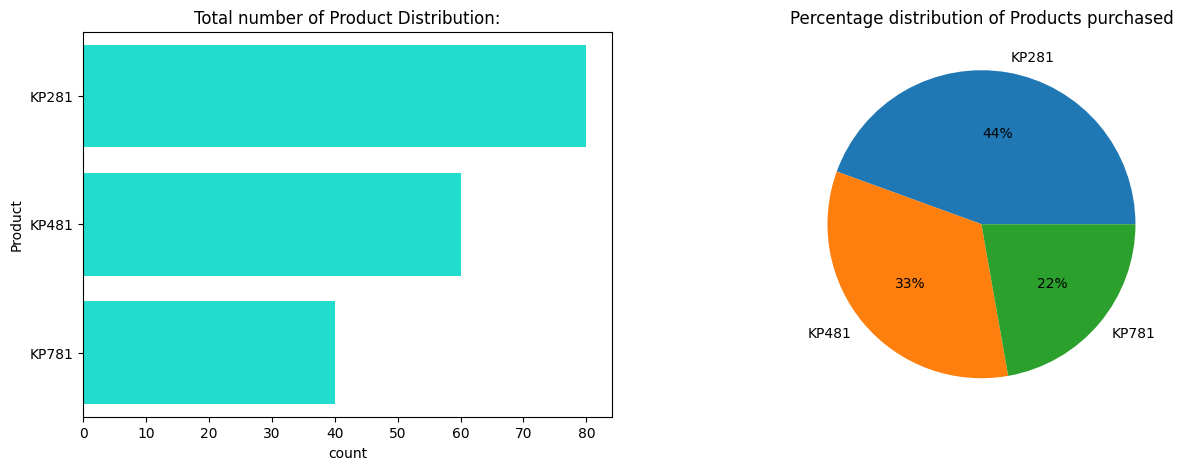

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df['Product'], color='#03fce8')
plt.title("Total number of Product Distribution:")
#plt.show()

product = df.groupby(['Product']).agg(count=('Product','count')).reset_index()
plt.subplot(1,2,2)
plt.pie(product["count"], labels=product["Product"], autopct='%.0f%%')
plt.title('Percentage distribution of Products purchased')
plt.show()

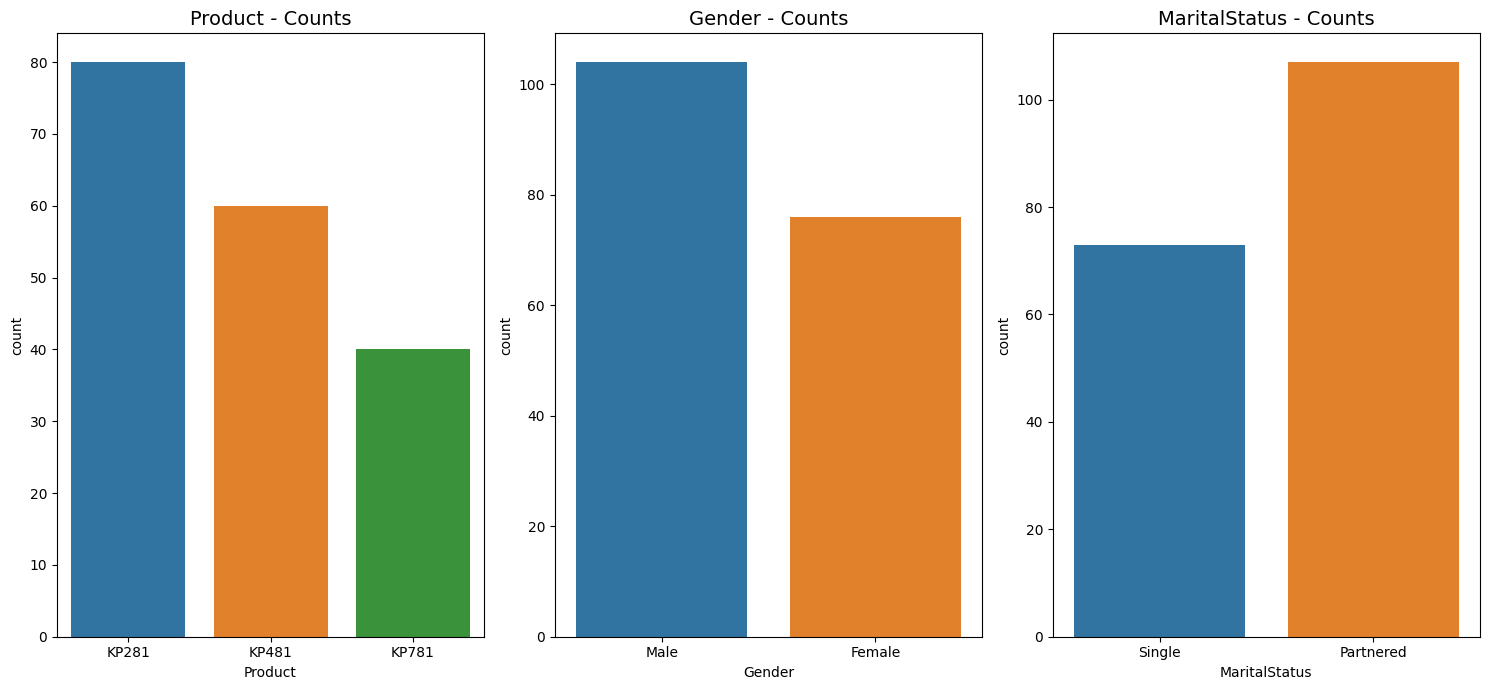

In [ ]:
cols_cat = df.select_dtypes(include='object').columns
fig, ax = plt.subplots(1,3,figsize=(15,7))
ax = ax.flatten()
for i in range(3):
  sns.countplot(x= df[cols_cat[i]], ax=ax[i], hue=df[cols_cat[i]])
  ax[i].set_title(f"{cols_cat[i]} - Counts", fontsize=14)

plt.tight_layout()
plt.show()

First three points made in last insights can be observe here i.e. Males are more than females among customers, Partnered are more than Single among customers and KP281 is the most sold product in data.

### **Distribution and Skewness Check:**

In [ ]:
col_num = df.select_dtypes(exclude='object').columns
col_num

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

In [ ]:
df['Age'] = round(df['Age'], 0)
df['Income'] = round(df['Income'], 0)
df['Usage'] = round(df['Usage'], 0)

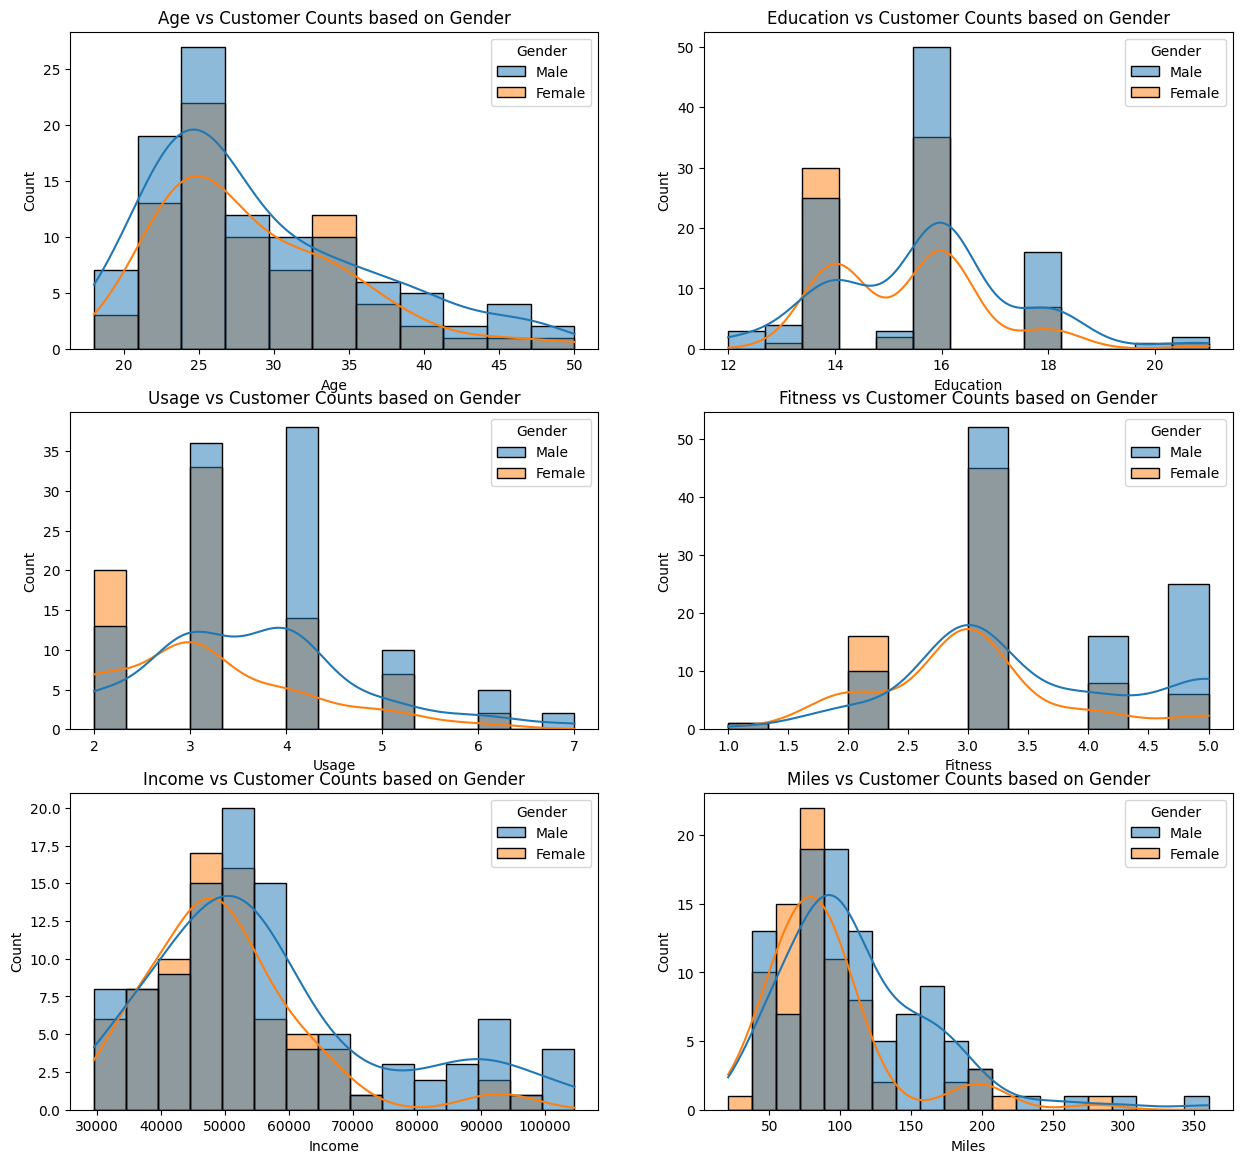

In [ ]:
cols = 2
rows = len(col_num)//cols
fig, ax = plt.subplots(rows, cols, figsize=(15, 14))

ax = ax.flatten()
for i in range(len(col_num)):
  sns.histplot(x=df[col_num[i]], ax=ax[i], kde=True, hue=df['Gender'])
  ax[i].set_title(f"{col_num[i]} vs Customer Counts based on Gender")
plt.show()

In [ ]:
skewness_values = df[col_num].skew()
skewness_values

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

**Insights**

* The presence of positive skewness in the `Age` distribution indicates that the **majority of customers** in the treadmill market are **younger individuals.**
* The presence of positive skewness in the `Usage` distribution indicates that the **majority of customers** in the treadmill market plan to use treadmill for **less than 5 days a week**.
* The presence of positive skewness in the `Income` distribution indicates that the** majority of customers** in the treadmill market are individuals having **less than average income**.
* The presence of positive skewness in the `Miles` distribution indicates that the **majority of customers** in the treadmill market plan to **run below 200 miles**.

### **Detect Outliers:**

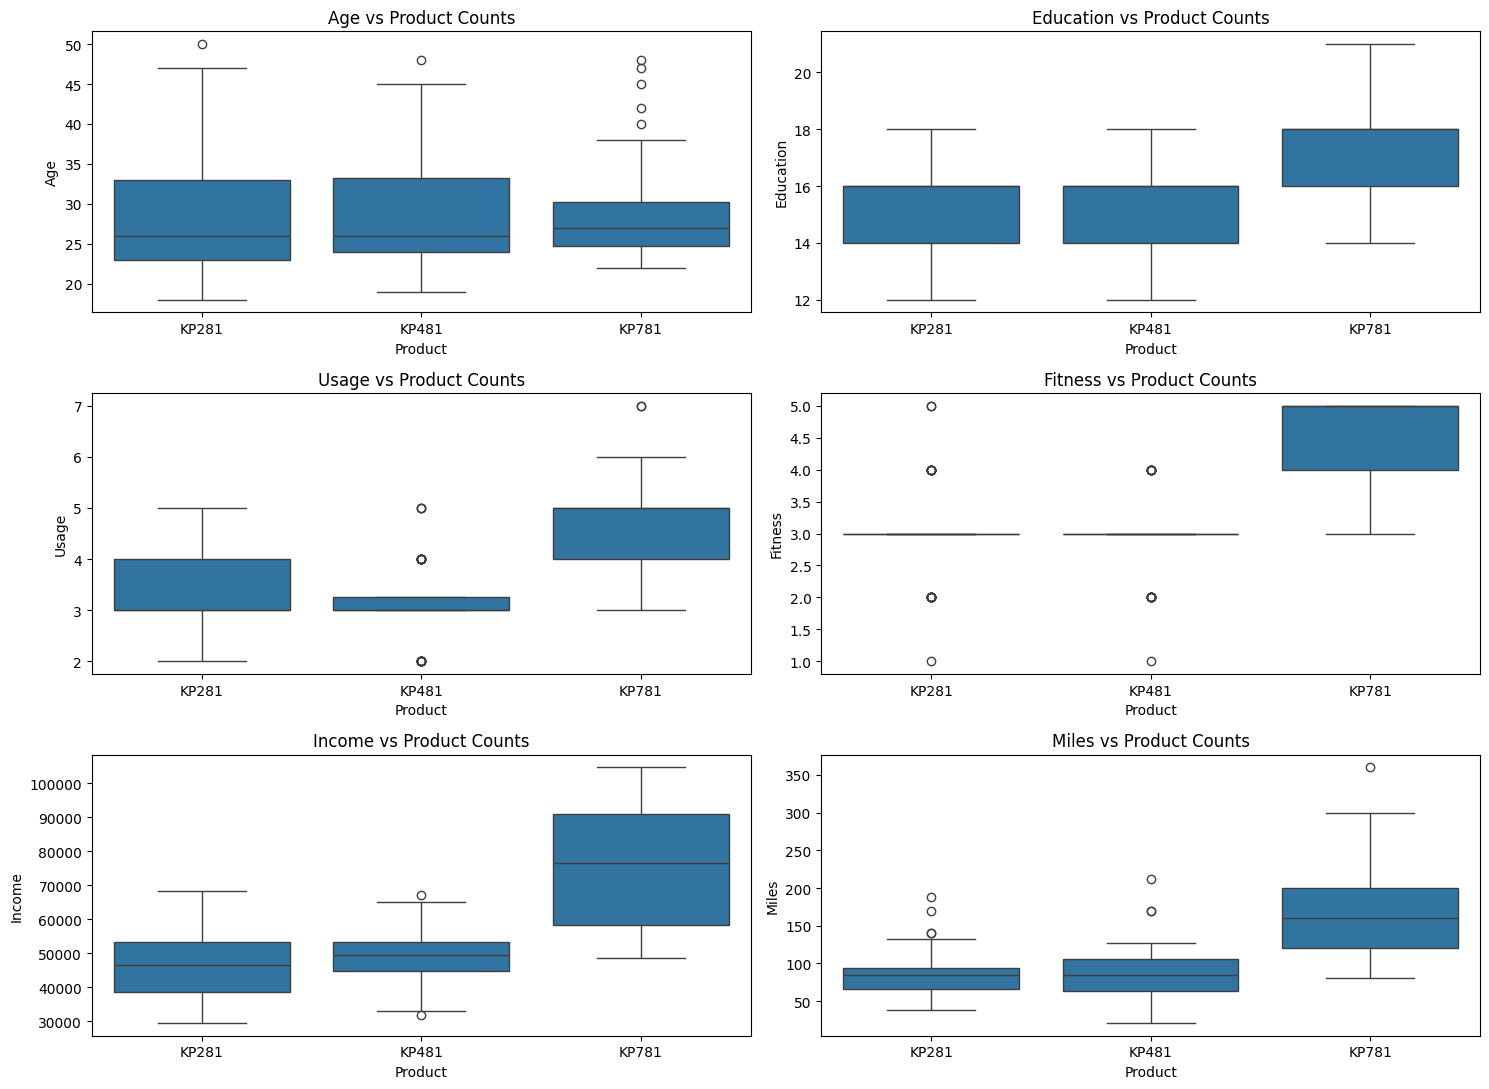

In [ ]:
cols = 2
rows = len(col_num)//cols
fig, ax = plt.subplots(rows, cols, figsize=(15, 11))

ax = ax.flatten()

for i in range(len(col_num)):
  sns.boxplot(y = df[col_num[i]], x=df['Product'], ax=ax[i])
  ax[i].set_title(f"{col_num[i]} vs Product Counts")

plt.tight_layout()
plt.show()

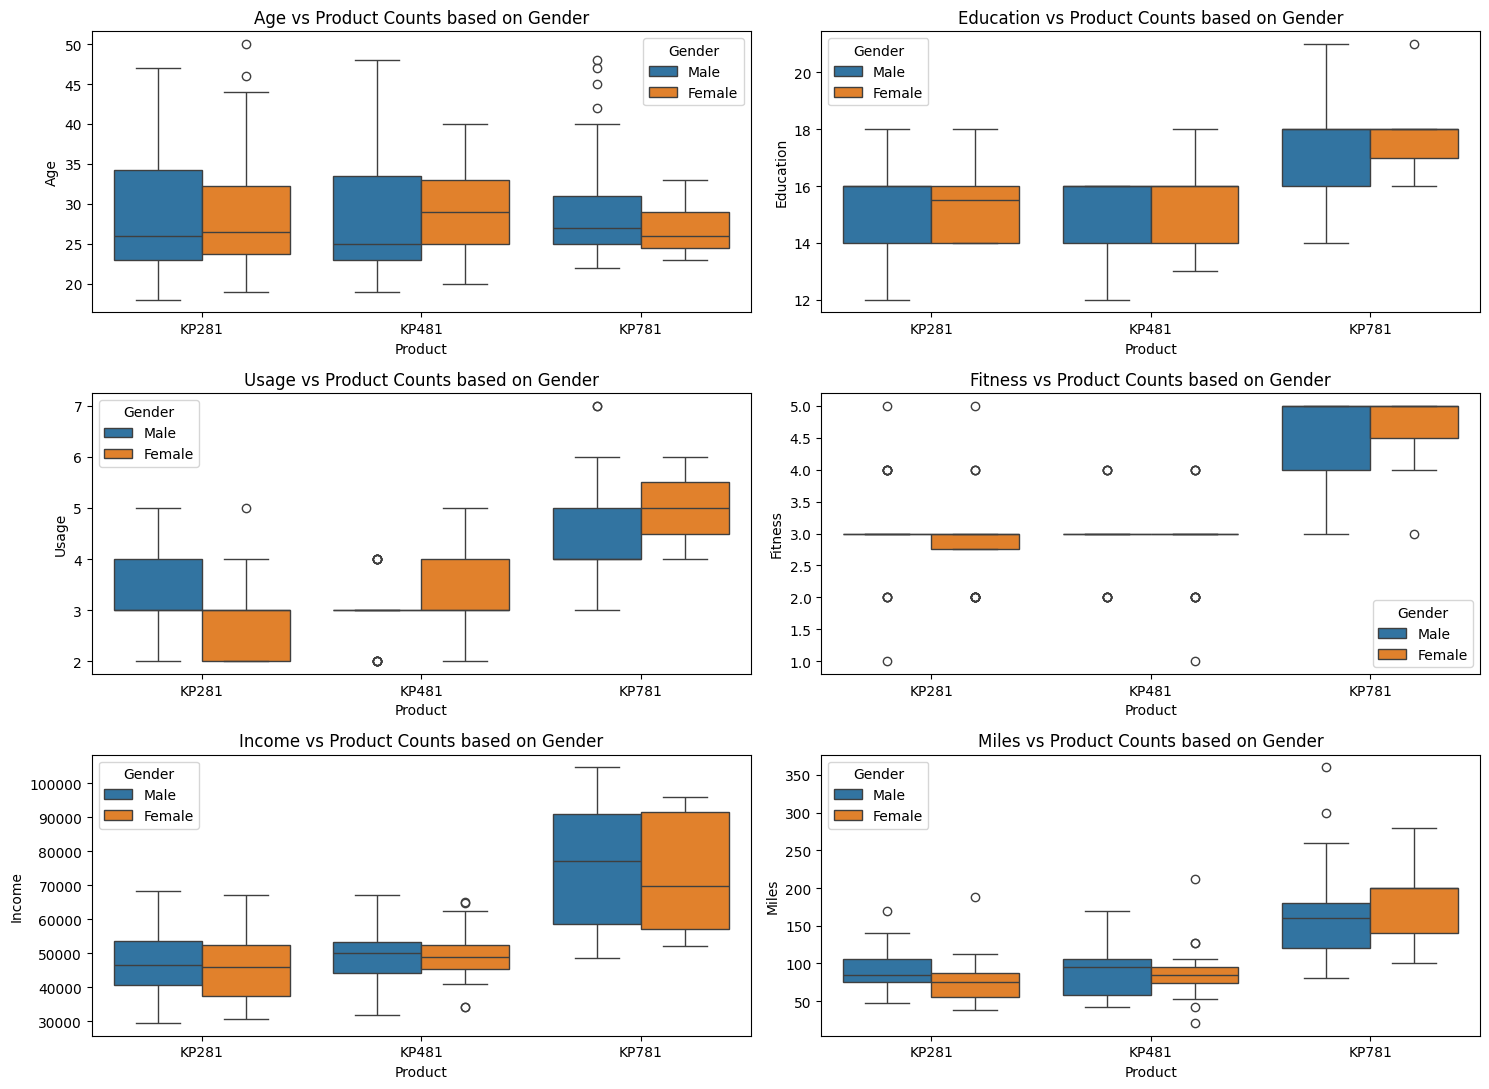

In [ ]:
cols = 2
rows = len(col_num)//cols
fig, ax = plt.subplots(rows, cols, figsize=(15, 11))

ax = ax.flatten()

for i in range(len(col_num)):
  sns.boxplot(y = df[col_num[i]], x=df['Product'], ax=ax[i], hue=df['Gender'])
  ax[i].set_title(f"{col_num[i]} vs Product Counts based on Gender")

plt.tight_layout()
plt.show()

***Insights:***

The outlier looks valid based on real life scenario prespective and therefore we should not remove these data-points. **For example:**

* There can be people from different age groups that can buy models different from the rest of the population belonging to that age group.
* Also people with different incomes can buy models that are different from the preference of the population belonging to that income range.

**Other Observations:**
* If the Customer is having higher income(**income >= 60,000**), it is more likely that he/she will purchase **KP781** model.
* Customers who prefer to use the trademill for **atleast 4 days a week**, most likely to buy **KP781** model.
* More the Customer is fit(**fitness >=3**), higher the chance that customer will buy **KP781** model.

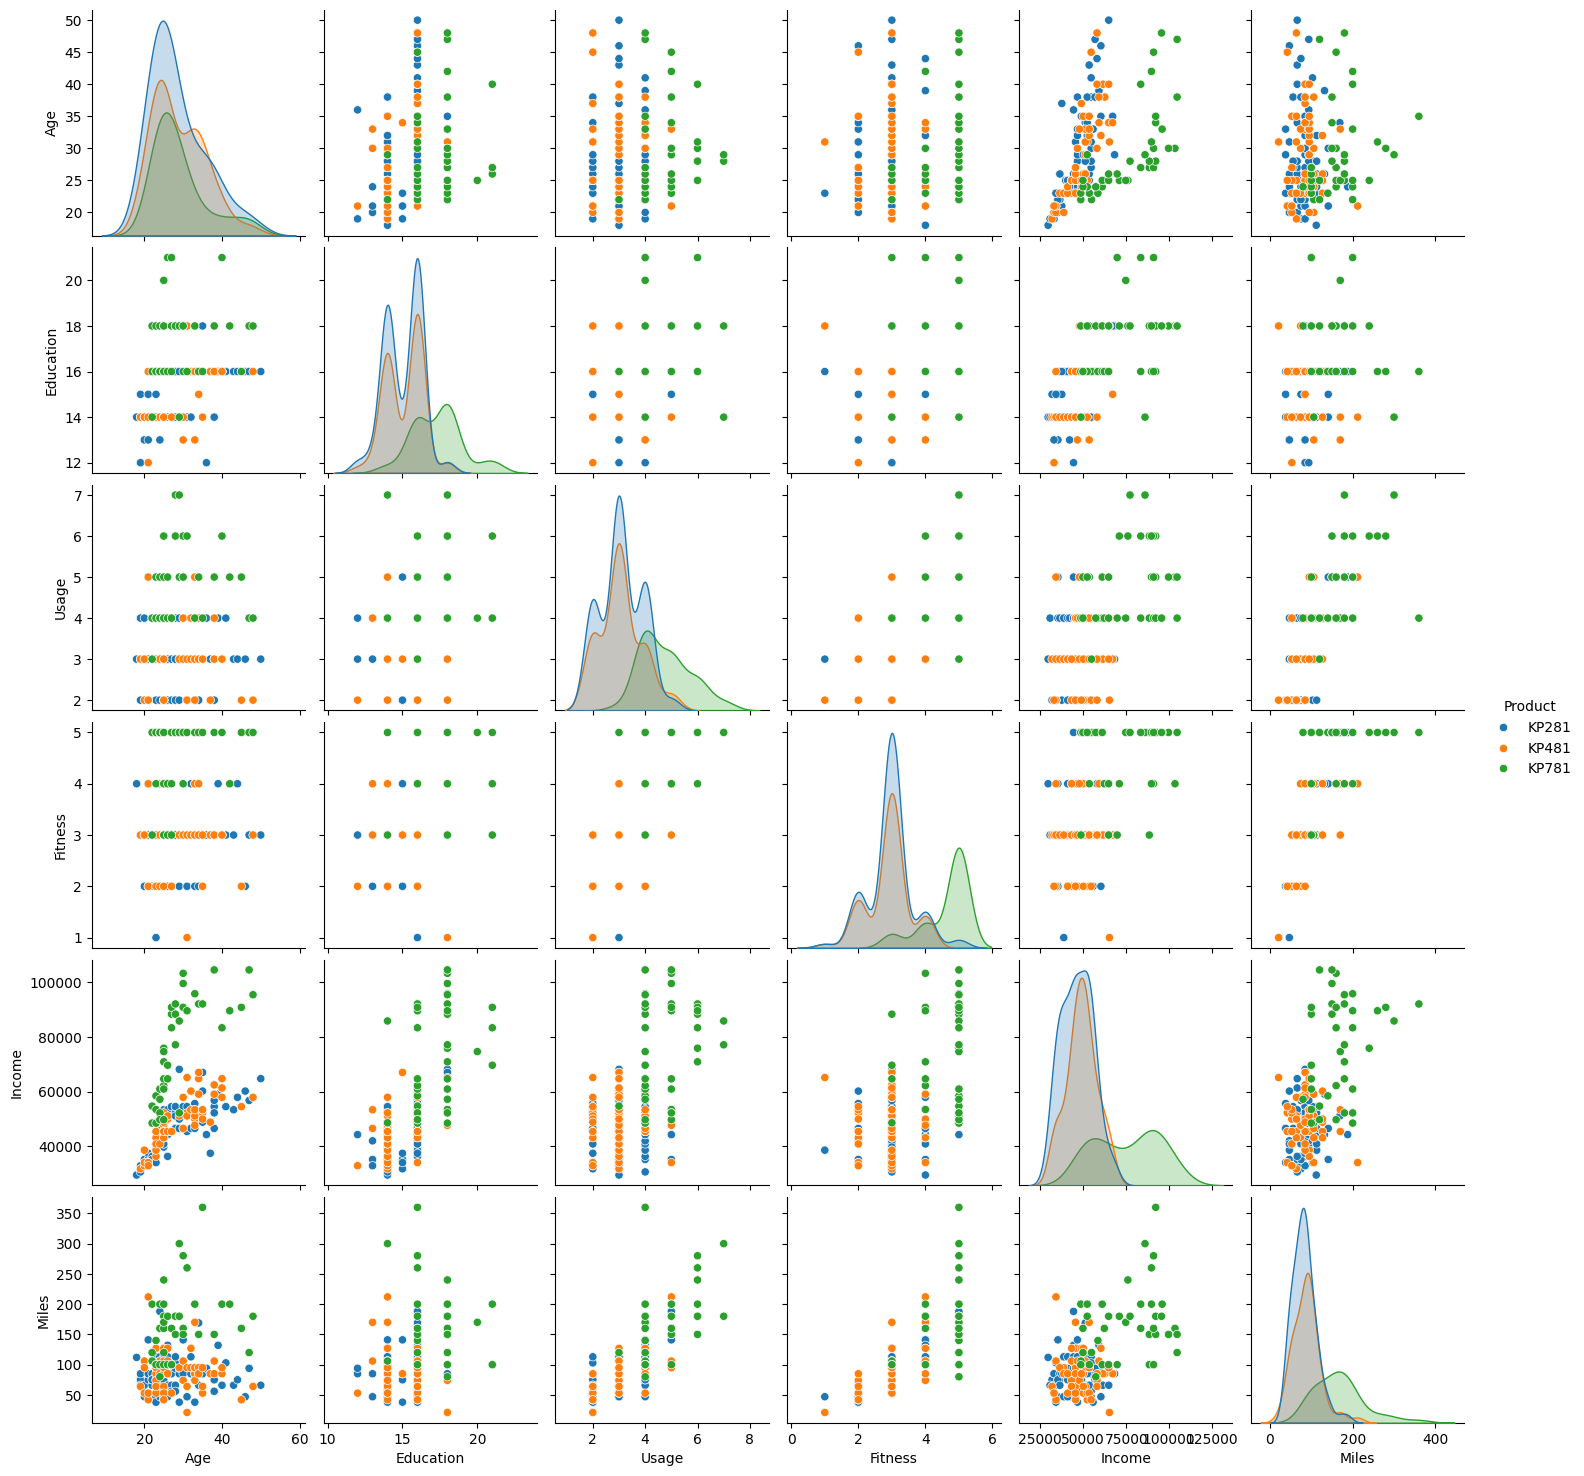

In [ ]:
sns.pairplot(df, hue='Product')
plt.show()

### **Correlation HeatMap:**

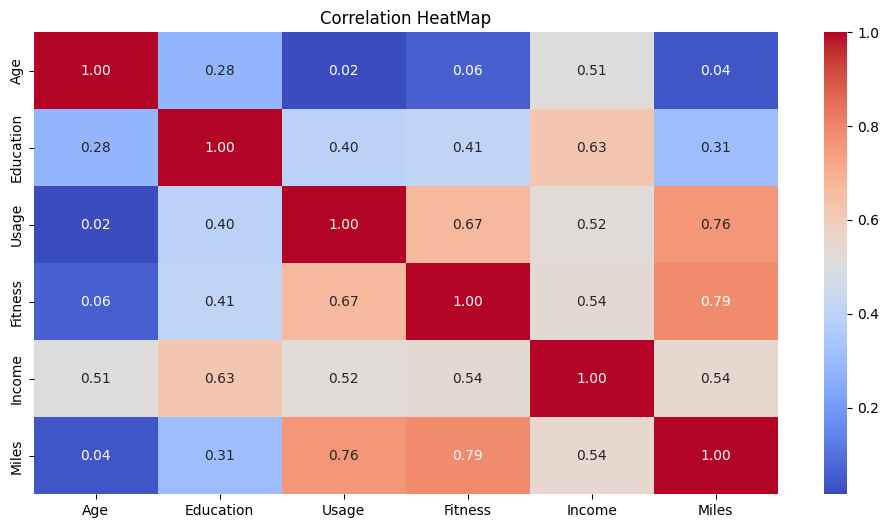

In [ ]:
df_num = df.loc[:, col_num]
plt.figure(figsize=(12,6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation HeatMap")
plt.show()


***Insights:***

* The analysis reveals a **strong positive** correlation among 'Fitness', 'Usage', and 'Miles', which aligns with the expectations.
* Correlation indicates that individuals with **higher fitness levels** tends to **utilize** the treadmill **more frequently**, resulting in **increased mileage**.

### **Probability:**

In [ ]:
pd.crosstab(columns=df['Product'], index= df['Gender'], normalize='columns', margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778


***Insights:***

* Given that Product is **KP281**, there is **0.5** probability that buyer is **female** and **0.5** probability of being **male**.
* Given that Product is **KP481**, there is **0.483** probability that buyer is **female** and **0.516** probability of being **male**.
* Given that Product is **KP781**, there is **0.175** probability that buyer is female and **0.825** probability of being **male**.

In [ ]:
pd.crosstab(columns=df['Product'], index=df['Gender'], normalize='index', margins=True)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


***Insights:***

* Given that buyer is a **female**, there is **0.526** probability that product is **KP281**, **0.381** probability of being **KP481**, and **0.092** probability of being **KP781**.
* Given that buyer is a **male**, there is **0.384** probability that product is **KP281**, **0.298** probability of being **KP481**, and **0.317** probability of being **KP781**.




In [ ]:
pd.crosstab(columns=df['Product'], index=df['MaritalStatus'], normalize='columns', margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.6,0.6,0.575,0.594444
Single,0.4,0.4,0.425,0.405556


***Insights:***

* Given that Product is **KP281**, there is **0.6** probability that buyer is **partnered** and **0.4** probability of being **single**.
* Given that Product is **KP481**, there is **0.6** probability that buyer is **partnered** and **0.4** probability of being **single**.
* Given that Product is **KP781**, there is **0.575** probability that buyer is **partnered** and **0.425** probability of being **single**.

In [ ]:
pd.crosstab(columns=df['Product'], index=df['MaritalStatus'], normalize='index', margins=True)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


***Insights:***

* Given that buyer is a **partnered**, there is **0.448** probability that product is **KP281**, **0.336** probability of being **KP481**, and **0.214** probability of being **KP781**.
* Given that buyer is a **single**, there is **0.438** probability that product is **KP281**, **0.328** probability of being **KP481**, and **0.233** probability of being **KP781**.




In [ ]:
pd.crosstab(columns=df['Product'], index=df['Usage'], normalize='columns', margins=True)

Product,KP281,KP481,KP781,All
Usage,,,,
2,0.2375,0.233333,0.000,0.183333
3,0.4625,0.516667,0.025,0.383333
4,0.2750,0.200000,0.450,0.288889
5,0.0250,0.050000,0.300,0.094444
6,0.0000,0.000000,0.175,0.038889
7,0.0000,0.000000,0.050,0.011111


***Insights:***

* Given that Product is **KP281**, there is **0.975** probability that buyer uses trademill atmost 4 days a week and **0.025** probability of buyer uses trademill more than 4 days a week.
* Given that Product is **KP481**, there is **0.7499** probability that buyer uses trademill atmost 3 days a week and **0.250** probability of buyer uses trademill more than 3 days a week.
* Given that Product is **KP781**, there is **0.025** probability that buyer uses trademill atmost 3 days a week and **0.975** probability of buyer uses trademill more than 3 days a week.

In [ ]:
pd.crosstab(columns=df['Product'], index=df['Usage'], normalize='index', margins=True)

Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222


In [ ]:
pd.crosstab(columns=df['Product'], index=df['Fitness'], normalize='columns', margins=True)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.0125,0.016667,0.000,0.011111
2,0.1750,0.200000,0.000,0.144444
3,0.6750,0.650000,0.100,0.538889
4,0.1125,0.133333,0.175,0.133333
5,0.0250,0.000000,0.725,0.172222


***Insights:***

* Given that Product is **KP281**, there is **0.8625** probability that buyer has fitness level less than or equal to 3 and **0.137** probability of buyer has fitness level more than 3.
* Given that Product is **KP481**, there is **0.8666** probability that buyer has fitness level less than or equal to 3 and **0.133** probability of buyer has fitness level more than 3.
* Given that Product is **KP781**, there is **0.100** probability that buyer has fitness level less than or equal to 3 and **0.899** probability of buyer has fitness level more than 3.

In [ ]:
pd.crosstab(columns=df['Product'], index=df['Fitness'], normalize='index', margins=True)

Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222


In [ ]:
pd.crosstab(columns=df['Product'], index=df['Education'], normalize='columns', margins=True)

Product,KP281,KP481,KP781,All
Education,,,,
12,0.0250,0.016667,0.000,0.016667
13,0.0375,0.033333,0.000,0.027778
14,0.3750,0.383333,0.050,0.305556
15,0.0500,0.016667,0.000,0.027778
16,0.4875,0.516667,0.375,0.472222
18,0.0250,0.033333,0.475,0.127778
20,0.0000,0.000000,0.025,0.005556
21,0.0000,0.000000,0.075,0.016667


***Insights:***

* Given that Product is **KP281**, there is **0.975** probability that buyer has education of atmost 16 years and **0.025** probability of buyer has education of more than 16 years.
* Given that Product is **KP481**, there is **0.9646** probability that buyer has education of atmost 16 years and **0.035** probability of buyer has education of more than 16 years.
* Given that Product is **KP781**, there is **0.050** probability that buyer has education of less than 16 years and **0.950** probability of buyer has education of atleast 16 years.

In [ ]:
pd.crosstab(columns=df['Product'], index=df['Education'], normalize='index', margins=True)

Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222


In [ ]:
def age_category(x):
  if x<35:
    return 'Young'
  elif 35<=x<50:
    return 'Middle Aged'
  else:
    return 'Old'

df['Age_cat'] = df['Age'].apply(age_category)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_cat,Age_cat
0,KP281,18,Male,14,Single,3,4,29562,112,Low,Young
1,KP281,19,Male,15,Single,2,3,31836,75,Low,Young
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low,Young
3,KP281,19,Male,12,Single,3,3,32973,85,Low,Young
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low,Young


In [ ]:
pd.crosstab(columns=df['Product'], index=df['Age_cat'], margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
Age_cat,,,,
Middle Aged,0.2000,0.2,0.175,0.194444
Old,0.0125,0.0,0.000,0.005556
Young,0.7875,0.8,0.825,0.800000


In [ ]:
pd.crosstab(columns=df['Product'], index=df['Age_cat'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Age_cat,,,
Middle Aged,0.457143,0.342857,0.200000
Old,1.000000,0.000000,0.000000
Young,0.437500,0.333333,0.229167
All,0.444444,0.333333,0.222222


In [ ]:
income_25_percentile = np.percentile(df['Income'], 25)
income_50_percentile = np.percentile(df['Income'], 50)
income_75_percentile = np.percentile(df['Income'], 75)

(income_25_percentile, income_50_percentile, income_75_percentile)

(44058.75, 50596.5, 58668.0)

In [ ]:

def income_category(x):
  if x < income_25_percentile:
    return 'Low'
  elif income_25_percentile <= x < income_50_percentile:
    return 'Medium'
  elif income_50_percentile <= x < income_75_percentile:
    return 'High'
  else :
    return "Very High"

df['Income_cat'] = df['Income'].apply(income_category)

In [ ]:
pd.crosstab(columns=df['Product'], index=df['Income_cat'], margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
Income_cat,,,,
High,0.2875,0.266667,0.150,0.25
Low,0.3750,0.250000,0.000,0.25
Medium,0.2500,0.333333,0.125,0.25
Very High,0.0875,0.150000,0.725,0.25


In [ ]:
pd.crosstab(columns=df['Product'], index=df['Income_cat'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Income_cat,,,
High,0.511111,0.355556,0.133333
Low,0.666667,0.333333,0.000000
Medium,0.444444,0.444444,0.111111
Very High,0.155556,0.200000,0.644444
All,0.444444,0.333333,0.222222


In [ ]:
miles_25_percentile = np.percentile(df['Miles'], 25)
miles_50_percentile = np.percentile(df['Miles'], 50)
miles_75_percentile = np.percentile(df['Miles'], 75)

(miles_25_percentile, miles_50_percentile, miles_75_percentile)

(66.0, 94.0, 114.75)

In [ ]:
def runner(x):
  if x<miles_25_percentile:
    return 'Bignner'
  elif miles_25_percentile<=x<miles_50_percentile:
    return 'Intermediate'
  elif miles_50_percentile<=x<miles_75_percentile:
    return 'Advanced'
  else:
    return 'Expert'

df['Miles_cat'] = df['Miles'].apply(runner)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_cat,Age_cat,Miles_cat
0,KP281,18,Male,14,Single,3,4,29562,112,Low,Young,Advanced
1,KP281,19,Male,15,Single,2,3,31836,75,Low,Young,Intermediate
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low,Young,Intermediate
3,KP281,19,Male,12,Single,3,3,32973,85,Low,Young,Intermediate
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low,Young,Bignner


In [ ]:
pd.crosstab(columns=df['Product'], index=df['Miles_cat'], margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
Miles_cat,,,,
Advanced,0.250,0.333333,0.200,0.266667
Bignner,0.225,0.300000,0.000,0.200000
Expert,0.075,0.133333,0.775,0.250000
Intermediate,0.450,0.233333,0.025,0.283333


In [ ]:
pd.crosstab(columns=df['Product'], index=df['Miles_cat'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Miles_cat,,,
Advanced,0.416667,0.416667,0.166667
Bignner,0.500000,0.500000,0.000000
Expert,0.133333,0.177778,0.688889
Intermediate,0.705882,0.274510,0.019608
All,0.444444,0.333333,0.222222


### **Customer Profile:**

* **Product - KP281:**

  * **Age:** Popular among young between **22 - 33 years** range.
  * **Gender:** Mostly preferred by **Females**  (**52% of all females** brought this Product whereas 38% of all males brought this product)
  * **Marital Status:** **Both** alike
  * **Fitness Level:** People with poor and average fitness (**fitness<=3**) prefer more but overall have a good control across all fitness level.
  * **Usage Level:** Average Number of **Usage <= 4** per week.
  * **Income Range:** Low, Medium and High income people (**30000<=income<= 58000**)
  * **Education:** 14-16 years mostly
  * **Miles:** popular among people who prefer to run less than 80 miles per week(**running < 80 miles**).

* **Product - KP481:**

  * **Age:** Popular among young between **24 - 33 years** range
  * **Gender:** Almost similar popularity distribution in **both** genders.
  * **Marital Status:** **both** alike
  * **Fitness Level:**  People with poor and average fitness (**fitness<=3**) prefer using this.
  * **Usage Level:** Average Number of **Usage <= 3** per week.
  * **Income Range:** Low, Medium and High income people (**30000<=income<= 58000**)
  * **Education:** 14-16 years mostly
  * **Miles:** popular among people who prefer to run less than 120 miles per week(**running < 120 miles**).

* **Product - KP781:**

  * **Age:** Popular among young between **25 - 30 years** range
  * **Gender:** Males prefer more than Females
  * **Marital Status:** **both** alike
  * **Fitness Level:** People with High fitness level like **fitness==5**
  * **Usage Level:** Average Number of **Usage >= 4** per week.
  * **Income Range:** High and Very High income people (**income>60000**)
  * **Education:** 16-18 years mostly
  * **Miles:** popular among people who prefer to run more than 120 miles per week(**running > 120 miles**).

### **Recommendations:**

* Considering more **Female Customers** prefer **KP281 model**, targeted marketing Campaigns could be more effective in attracting the female customers by highlighting the features and benefits of KP281 Model.

* **Model KP781** is more preferred by the customers with **higher income**, **higher fitness level** and who are more **frequent runners**, henceforth targeted marketing campaigns highlighting performance and advanced features of KP781 should be used to attract/appeal this segment of customers.

* We could see **affordability/income** as one of the major factors while selecting the trademill, hence:
  * Emphasize **affordability, versatility and value for money features of KP281** to attract customers across all income levels.
  * Highlight the **premium features and advanced technology of KP781** to appeal to customers with higher income levels who are willing to invest in **top of the line** fitness equipment.
  * Provide attractive offers to the users using either **KP481** or **KP281** as upgrade options to **KP781** model.

